# Accuracy Saliency?

Does the treatment increase the relationship between accuracy and sharing behaviour?

Answer: **YES** there is a very significant interaction effect between the condition assignment and the perceived veracity of a rumour on the affirmation rate. Therefore, the intervention increased the saliency of accuracy in the sharing caclulus. *BUT* there is not a significant interaction between the condition assignment and evidence level on the perceived veracity of a rumour. Therefore, the intervention did not improve participants' accuracy judgements. I hypothesize that this is the broken link between my intervention and altering sharing patterns.

In [ ]:
library(lme4)
library(e1071) 
library(effects)
library(parameters) 
options(scipen = 100)

data <- read.csv("../../data/processed/60b37265a9f60881975de69e-reshare_rates.csv")
data$condition = as.factor(data$condition)
data$evidence = as.factor(data$evidence)
data$educationLevel = as.factor(data$educationLevel)
data$politicalAffiliation = as.factor(data$politicalAffiliation)
data$attendsProtests = as.factor(data$attendsProtests)
head(data)

In [2]:
md.baseline = lmer(sqrt(Affirms) ~ veracityEstimate + (1 |user_id), data = data)
p_value_satterthwaite(md.baseline)
summary(md.baseline)

Parameter,p
<chr>,<dbl>
(Intercept),0.000002159967
veracityEstimate,0.000196509000


Linear mixed model fit by REML ['lmerMod']
Formula: sqrt(Affirms) ~ veracityEstimate + (1 | user_id)
   Data: data

REML criterion at convergence: 15.3

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.92623 -0.61099 -0.05708  0.57014  2.38383 

Random effects:
 Groups   Name        Variance Std.Dev.
 user_id  (Intercept) 0.02956  0.1719  
 Residual             0.03643  0.1909  
Number of obs: 199, groups:  user_id, 107

Fixed effects:
                 Estimate Std. Error t value
(Intercept)      0.185751   0.038021   4.885
veracityEstimate 0.024022   0.006323   3.799

Correlation of Fixed Effects:
            (Intr)
verctyEstmt -0.824

In [3]:
md.interaction = lmer(sqrt(Affirms) ~ condition * veracityEstimate + evidence + (1 |user_id), data = data)
p_value_satterthwaite(md.interaction)
summary(md.interaction)

Parameter,p
<chr>,<dbl>
(Intercept),0.0000001483337
conditionTreatment,0.0438780888516
veracityEstimate,0.1988841871486
evidenceLow,0.0095616391319
conditionTreatment:veracityEstimate,0.0098580468982


Linear mixed model fit by REML ['lmerMod']
Formula: sqrt(Affirms) ~ condition * veracityEstimate + evidence + (1 |  
    user_id)
   Data: data

REML criterion at convergence: 17.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.0811 -0.5785 -0.0229  0.5181  2.5649 

Random effects:
 Groups   Name        Variance Std.Dev.
 user_id  (Intercept) 0.03019  0.1737  
 Residual             0.03305  0.1818  
Number of obs: 199, groups:  user_id, 107

Fixed effects:
                                     Estimate Std. Error t value
(Intercept)                          0.287187   0.052649   5.455
conditionTreatment                  -0.150778   0.074322  -2.029
veracityEstimate                     0.010787   0.008364   1.290
evidenceLow                         -0.069990   0.026481  -2.643
conditionTreatment:veracityEstimate  0.032175   0.012337   2.608

Correlation of Fixed Effects:
            (Intr) cndtnT vrctyE evdncL
cndtnTrtmnt -0.679                     
verctyEstmt -0.785  0

In [4]:
anova(md.baseline,md.interaction)

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
md.baseline,4,9.1795345,22.35275,-0.5897672,1.179534,NA,NA,NA
md.interaction,7,0.4604815,23.51362,6.7697592,-13.539518,14.71905,3,0.00207318


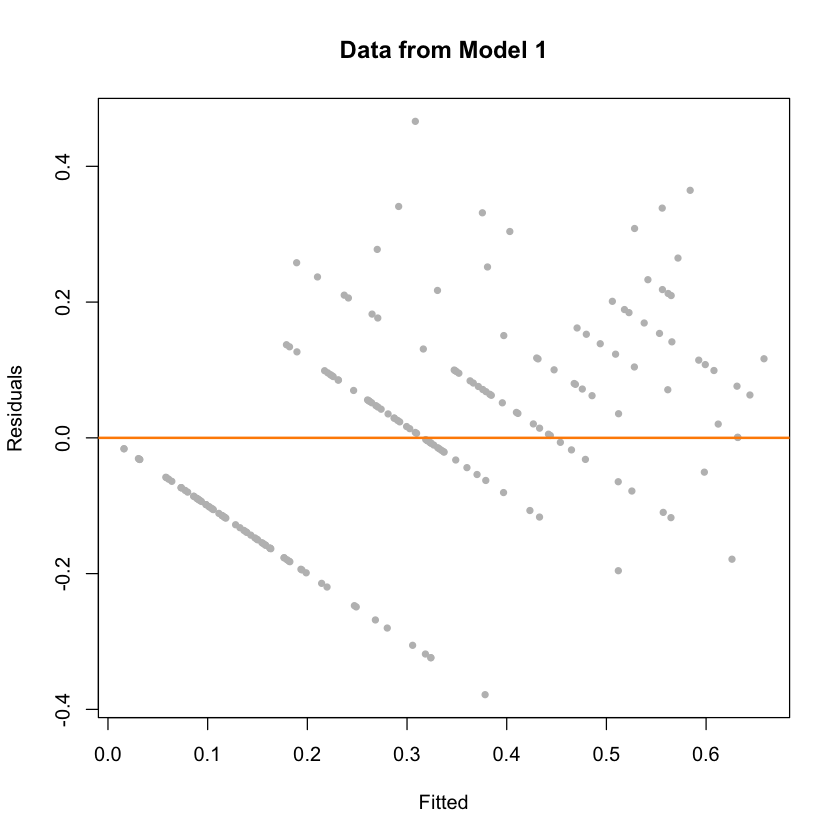

In [5]:
plot(fitted(md.interaction), resid(md.interaction), col = "grey", pch = 20,
     xlab = "Fitted", ylab = "Residuals", main = "Data from Model 1")
abline(h = 0, col = "darkorange", lwd = 2)


	Shapiro-Wilk normality test

data:  resid(md.interaction)
W = 0.99349, p-value = 0.5311


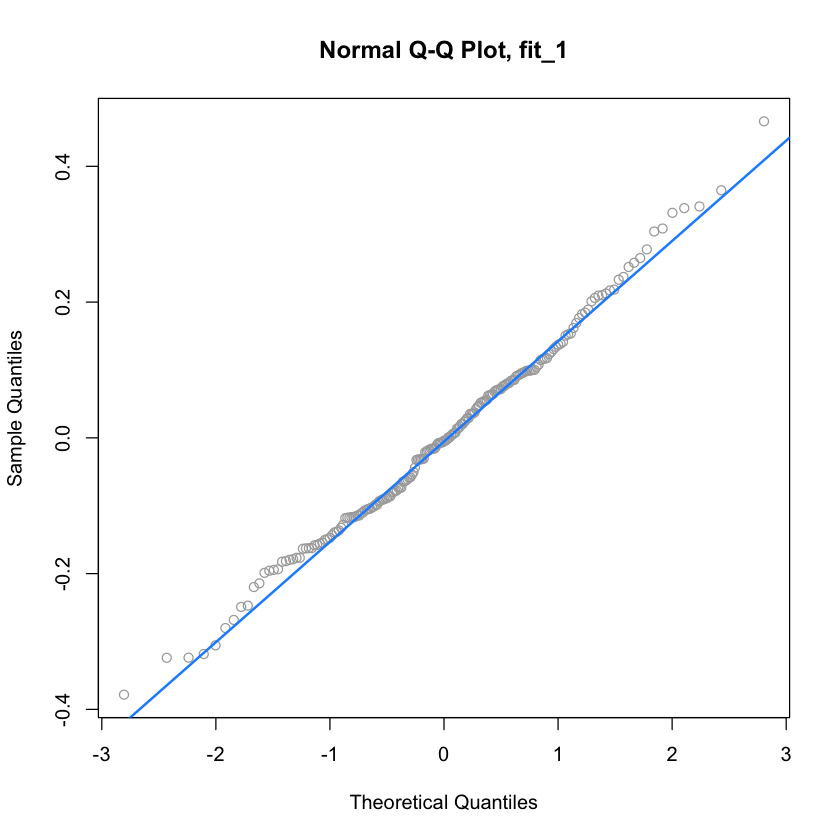

In [6]:
shapiro.test(resid(md.interaction))
qqnorm(resid(md.interaction), main = "Normal Q-Q Plot, fit_1", col = "darkgrey")
qqline(resid(md.interaction), col = "dodgerblue", lwd = 2)

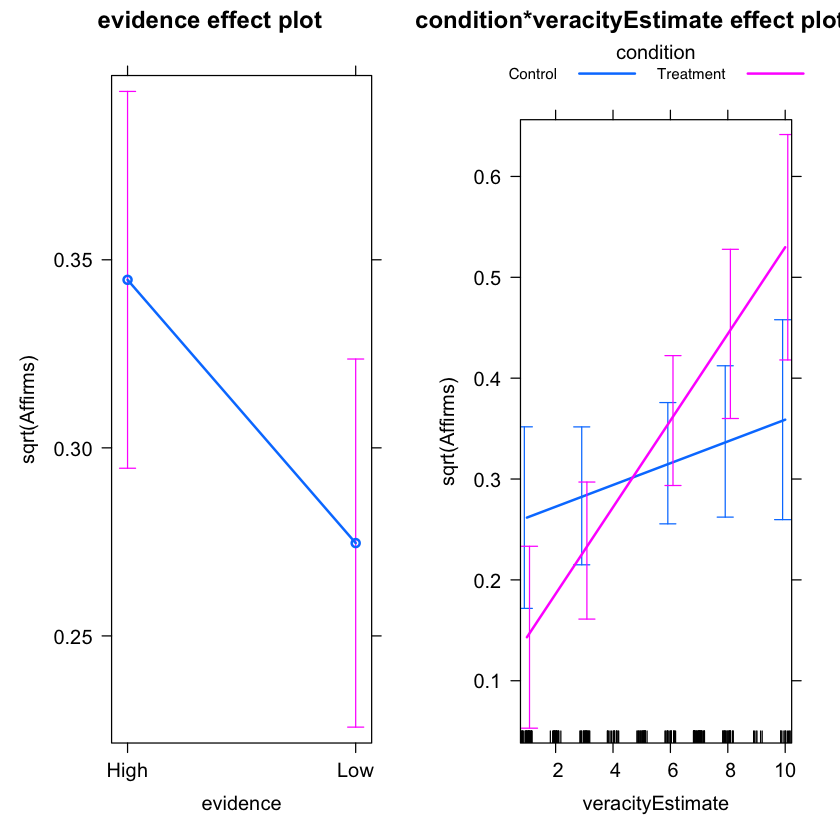

In [7]:
plot(allEffects(md.interaction), multiline=TRUE, ci.style="bars")

## A puzzle

The previous regressions show that the condition assignment does not make participants more likely to affirm high evidence rumours. These regressions show that the condition assignment increases the strength of the relationship between perceived rumour veracity and sharing behaviour. The only way that these two can be true is if the condition assigment *does not* affect perceived veracity.

This regression shows that $condition \times evidence $ does not have a significant relationship with perceived veracity. Thus, we can conclude that the intervention increases the salience of accuracy in the resharing calculus, but does not improve the participant's accuracy judgement. 

In [8]:
md.perceived = lmer(veracityEstimate ~ evidence * condition + (1 |user_id), data = data)
p_value_satterthwaite(md.perceived)
summary(md.perceived)

Parameter,p
<chr>,<dbl>
(Intercept),0.00000000000000000000000006451713
evidenceLow,0.10177842078204640818839266103168
conditionTreatment,0.92505791028480688353852201544214
evidenceLow:conditionTreatment,0.32033877954757156159004694018222


Linear mixed model fit by REML ['lmerMod']
Formula: veracityEstimate ~ evidence * condition + (1 | user_id)
   Data: data

REML criterion at convergence: 955.9

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.71326 -0.79885  0.06025  0.76650  1.81376 

Random effects:
 Groups   Name        Variance Std.Dev.
 user_id  (Intercept) 1.757    1.325   
 Residual             5.711    2.390   
Number of obs: 199, groups:  user_id, 107

Fixed effects:
                               Estimate Std. Error t value
(Intercept)                     4.74174    0.38549  12.301
evidenceLow                     0.78442    0.47494   1.652
conditionTreatment             -0.05244    0.55670  -0.094
evidenceLow:conditionTreatment -0.68373    0.68460  -0.999

Correlation of Fixed Effects:
            (Intr) evdncL cndtnT
evidenceLow -0.638              
cndtnTrtmnt -0.692  0.442       
evdncLw:cnT  0.442 -0.694 -0.641

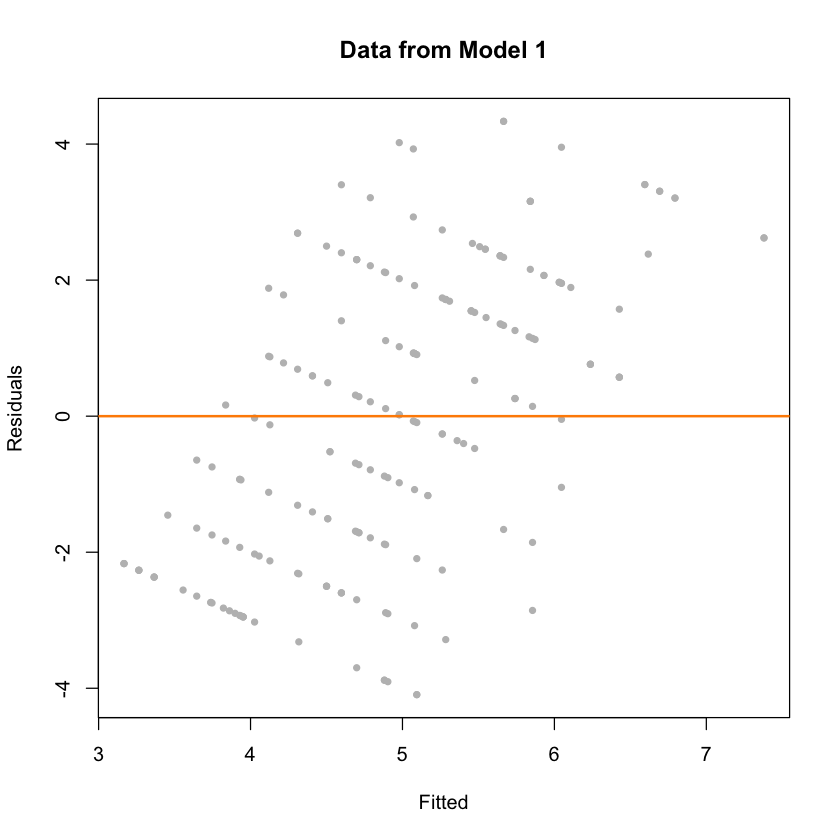

In [9]:
plot(fitted(md.perceived), resid(md.perceived), col = "grey", pch = 20,
     xlab = "Fitted", ylab = "Residuals", main = "Data from Model 1")
abline(h = 0, col = "darkorange", lwd = 2)


	Shapiro-Wilk normality test

data:  resid(md.perceived)
W = 0.96359, p-value = 0.00005159


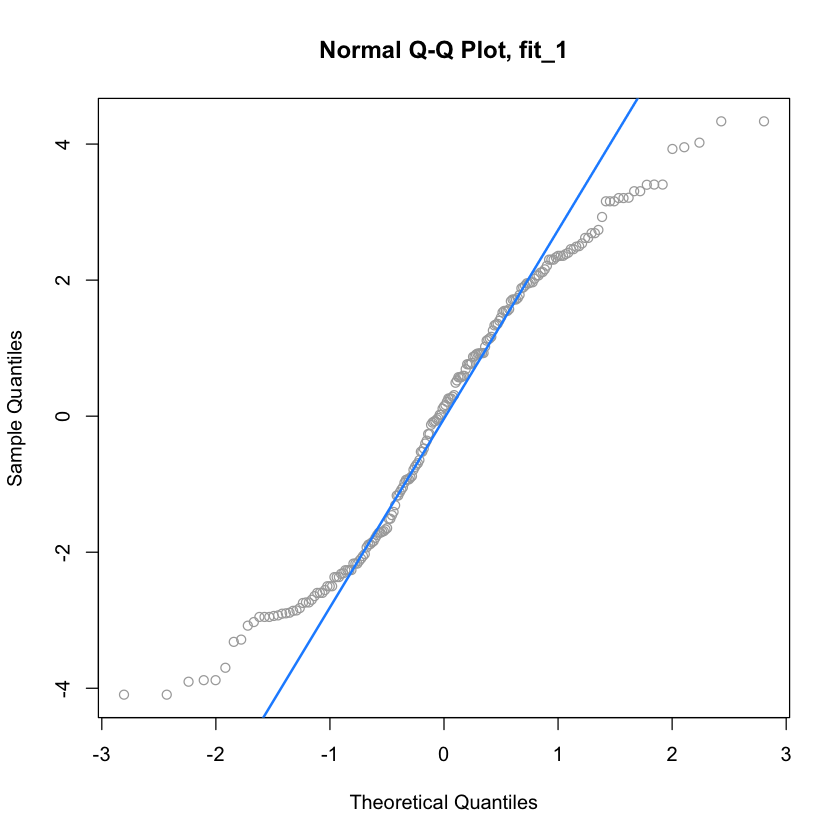

In [10]:
shapiro.test(resid(md.perceived))
qqnorm(resid(md.perceived), main = "Normal Q-Q Plot, fit_1", col = "darkgrey")
qqline(resid(md.perceived), col = "dodgerblue", lwd = 2)

#### NOT RELEVANT (maybe)

A mediation analysis seems relevant here, but I think my regresssions give the same sort of info in a way that I know is correct (probably)

In [11]:
library(mediation)

Loading required package: MASS

Loading required package: mvtnorm

Loading required package: sandwich

mediation: Causal Mediation Analysis
Version: 4.5.0




In [12]:
# Step #1: The total effect
fit.totaleffect=lmer(sqrt(Affirms) ~ evidence * condition + (1 |user_id), data = data)
# Step #3: The effect of the mediator on the dependent variable
fit.dv=lmer(sqrt(Affirms) ~ veracityEstimate + evidence * condition + (1 |user_id), data = data)
results = mediate(fit.mediator, 
                  fit.dv, 
                  treat='condition', 
                  mediator='veracityEstimate',
#                   boot=TRUE,
#                   sims=500
                 )
summary(results)

ERROR: Error in mediate(fit.mediator, fit.dv, treat = "condition", mediator = "veracityEstimate", : object 'fit.mediator' not found


In [ ]:
plot(results)